In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast

In [2]:
from Historic_Crypto import HistoricalData
from Historic_Crypto import Cryptocurrencies
from Historic_Crypto import LiveCryptoData

In [3]:
data = Cryptocurrencies(coin_search = 'USDC', extended_output=False).find_crypto_pairs()
data

Connected to the CoinBase Pro API.
Found 14 instances containing the term USDC.
Extended Output is False, returning reduced dataset.


,id,display_name,fx_stablecoin,max_slippage_percentage,status
66,BAT-USDC,BAT/USDC,False,0.03000000,online
82,CVC-USDC,CVC/USDC,False,0.03000000,online
101,DAI-USDC,DAI/USDC,True,0.01000000,online
108,USDC-GBP,USDC/GBP,True,0.01000000,online
118,USDC-EUR,USDC/EUR,True,0.01000000,online
215,ADA-USDC,ADA/USDC,False,0.03000000,online
222,ZEC-USDC,ZEC/USDC,False,0.03000000,online
243,DNT-USDC,DNT/USDC,False,0.03000000,online
247,MANA-USDC,MANA/USDC,False,0.03000000,online
263,USDT-USDC,USDT/USDC,True,0.01000000,online


In [4]:
period = 60*60*24 #seconds
asset_ls = ['BTC-USD','ETH-USD','ADA-USD']
daily_history_df = pd.DataFrame()

for asset in asset_ls:
    daily = HistoricalData(asset, period,'2019-10-28-00-00').retrieve_data()
    daily['ticker'] = asset
    daily_history_df = pd.concat([daily_history_df,daily])

daily_history_df

Checking input parameters are in the correct format.
Formatting Dates.
Checking if user supplied is available on the CoinBase Pro API.
Connected to the CoinBase Pro API.
Ticker 'BTC-USD' found at the CoinBase Pro API, continuing to extraction.
Provisional Start: 2019-10-28T00:00:00
Provisional End: 2020-08-23T00:00:00
Data for chunk 1 of 4 extracted
Provisional Start: 2020-08-23T00:00:00
Provisional End: 2021-06-19T00:00:00
Data for chunk 2 of 4 extracted
Provisional Start: 2021-06-19T00:00:00
Provisional End: 2022-04-15T00:00:00
Data for chunk 3 of 4 extracted
Provisional Start: 2022-04-15T00:00:00
Provisional End: 2023-02-09T00:00:00
Data for chunk 4 of 4 extracted
Checking input parameters are in the correct format.
Formatting Dates.
Checking if user supplied is available on the CoinBase Pro API.
Connected to the CoinBase Pro API.
Ticker 'ETH-USD' found at the CoinBase Pro API, continuing to extraction.
Provisional Start: 2019-10-28T00:00:00
Provisional End: 2020-08-23T00:00:00
Data

,low,high,open,close,volume,ticker
time,,,,,,
2019-10-29,9068.1900,9575.0000,9225.0600,9430.8000,1.264020e+04,BTC-USD
2019-10-30,8991.3300,9431.3600,9431.3600,9164.4400,9.862677e+03,BTC-USD
2019-10-31,8950.0000,9433.0000,9164.4500,9159.4800,8.326962e+03,BTC-USD
2019-11-01,9057.2700,9299.9900,9159.9600,9253.1200,7.774271e+03,BTC-USD
2019-11-02,9210.0000,9393.0000,9253.0900,9308.5200,4.559265e+03,BTC-USD
...,...,...,...,...,...,...
2022-05-24,0.4921,0.5246,0.5130,0.5214,7.538478e+07,ADA-USD
2022-05-25,0.5064,0.5320,0.5213,0.5139,5.403319e+07,ADA-USD
2022-05-26,0.4610,0.5204,0.5138,0.4785,9.333037e+07,ADA-USD


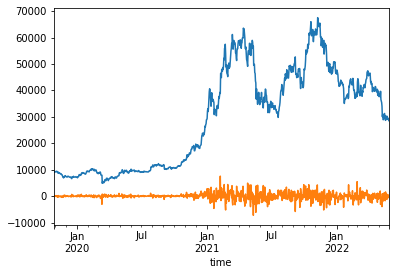

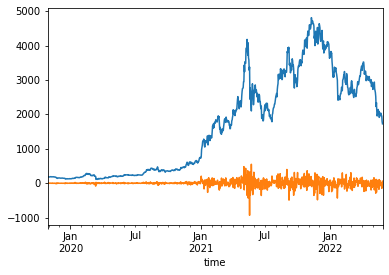

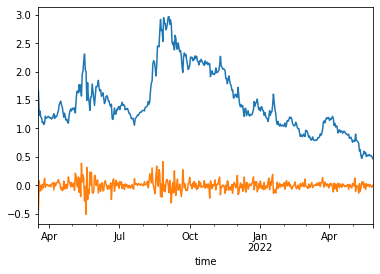

In [5]:
for asset in asset_ls:
    daily_df = daily_history_df[daily_history_df['ticker'] == asset].copy()
    daily_df['returns'] = daily_df['close'] -daily_df['open']
    daily_df['open'].plot()
    daily_df['returns'].plot()
    plt.show()

In [6]:
initial_allocation_ratio = np.array([[.6],[.2],[.1],[.1]])

portfolio_df = pd.DataFrame(np.repeat(initial_allocation_ratio, daily_df.shape[0], axis=1).T,columns=['BTC','ETH','ADA','USD'],index=daily_df.index)
portfolio_df

,BTC,ETH,ADA,USD
time,,,,
2021-03-18,0.6,0.2,0.1,0.1
2021-03-19,0.6,0.2,0.1,0.1
2021-03-20,0.6,0.2,0.1,0.1
2021-03-21,0.6,0.2,0.1,0.1
2021-03-22,0.6,0.2,0.1,0.1
...,...,...,...,...
2022-05-24,0.6,0.2,0.1,0.1
2022-05-25,0.6,0.2,0.1,0.1
2022-05-26,0.6,0.2,0.1,0.1


In [7]:
def get_daily_return(ticker, time, df=daily_history_df):
    if ticker == 'USD':
        return 1.0
    else:
        df = df.loc[time]
        asset_df = df[df['ticker'].apply(lambda x: ticker in x)]
        return (asset_df['close']/asset_df['open']).values[0]
    
"""
def calc_portfolio(row):
    global initial_allocation
    asset_ls = row.index
    time = row.name
    daily_returns_ls = np.array([get_daily_return(asset, time) for asset in asset_ls])
    shape = initial_allocation.shape
    initial_allocation = (daily_returns_ls.flatten() * initial_allocation.flatten()).reshape(shape)
    return sum(sum(initial_allocation))"""

'\ndef calc_portfolio(row):\n    global initial_allocation\n    asset_ls = row.index\n    time = row.name\n    daily_returns_ls = np.array([get_daily_return(asset, time) for asset in asset_ls])\n    shape = initial_allocation.shape\n    initial_allocation = (daily_returns_ls.flatten() * initial_allocation.flatten()).reshape(shape)\n    return sum(sum(initial_allocation))'

In [8]:
def calc_asset_daily_returns(row):
    asset_ls = row.index
    time = row.name
    daily_returns_ls = np.array([get_daily_return(asset, time) for asset in asset_ls])
    return daily_returns_ls

In [9]:
def get_random_ratio():
    r_ar = np.random.random((4,1))
    random_portfolio_ratio = r_ar / sum(r_ar)
    return (random_portfolio_ratio * 100).astype(int)/100

In [10]:
asset_daily_returns_df = portfolio_df.apply(lambda x: pd.Series(calc_asset_daily_returns(x),index=portfolio_df.columns), axis=1)
asset_daily_returns_df

,BTC,ETH,ADA,USD
time,,,,
2021-03-18,0.978268,0.973663,0.743158,1.0
2021-03-19,1.006847,1.018566,1.062140,1.0
2021-03-20,1.001547,0.998629,0.919480,1.0
2021-03-21,0.986873,0.987797,0.989345,1.0
2021-03-22,0.943057,0.942218,0.927808,1.0
...,...,...,...,...
2022-05-24,1.018815,1.003704,1.016374,1.0
2022-05-25,0.995811,0.981238,0.985805,1.0
2022-05-26,0.988563,0.922787,0.931296,1.0


In [11]:
def get_accumulated_return(initial_allocation_total_value=1000.00, initial_allocation_ratio=np.array([[.6],[.2],[.1],[.1]]), asset_daily_returns_df=asset_daily_returns_df):

    initial_allocation = initial_allocation_ratio * initial_allocation_total_value 
    portfolio_df = pd.DataFrame(np.repeat(initial_allocation_ratio, daily_df.shape[0], axis=1).T,columns=['BTC','ETH','ADA','USD'],index=daily_df.index)
    

    return_df = (asset_daily_returns_df).shift(1)
    accumulator_df = pd.DataFrame(columns=asset_daily_returns_df.columns,index=asset_daily_returns_df.index)
    accumulator_df.iloc[0] = pd.Series(initial_allocation.flatten(),index=asset_daily_returns_df.columns)

    for index, row in accumulator_df.iterrows():
        if index > accumulator_df.iloc[0].name:
            accumulator_df.loc[index] = prev * return_df.loc[index]
        prev = accumulator_df.loc[index]

    return accumulator_df#.sum(axis=1)

get_accumulated_return(initial_allocation_ratio=np.array([[.6],[.2],[.1],[.1]]))

,BTC,ETH,ADA,USD
time,,,,
2021-03-18,600,200,100,100
2021-03-19,586.961,194.733,74.3158,100
2021-03-20,590.98,198.348,78.9337,100
2021-03-21,591.894,198.076,72.5779,100
2021-03-22,584.124,195.659,71.8046,100
...,...,...,...,...
2022-05-24,296.078,215.981,30.6043,100
2022-05-25,301.649,216.78,31.1054,100
2022-05-26,300.385,212.713,30.6639,100


[[600.]
 [200.]
 [100.]
 [100.]]


,[0.6 0.2 0.1 0.1]
time,
2021-03-18,1000.000000
2021-03-19,956.009005
2021-03-20,968.261361
2021-03-21,962.548128
2021-03-22,951.587832
...,...
2022-05-24,642.663049
2022-05-25,649.534902
2022-05-26,643.762419


[[100.]
 [200.]
 [600.]
 [100.]]


,[0.1 0.2 0.6 0.1]
time,
2021-03-18,1000.000000
2021-03-19,838.453933
2021-03-20,870.446798
2021-03-21,832.192610
2021-03-22,823.840471
...,...
2022-05-24,548.952563
2022-05-25,553.687745
2022-05-26,546.760603


[[200.]
 [100.]
 [100.]
 [600.]]


,[0.2 0.1 0.1 0.6]
time,
2021-03-18,1000.000000
2021-03-19,967.335612
2021-03-20,975.100919
2021-03-21,968.914000
2021-03-22,964.342147
...,...
2022-05-24,837.287287
2022-05-25,840.045318
2022-05-26,837.148920


[[ 90.]
 [360.]
 [ 20.]
 [500.]]


,[0.09 0.36 0.02 0.5 ]
time,
2021-03-18,970.000000
2021-03-19,953.426026
2021-03-20,961.460081
2021-03-21,959.836627
2021-03-22,954.165503
...,...
2022-05-24,939.297507
2022-05-25,941.673323
2022-05-26,934.074454


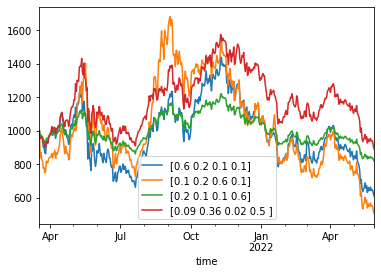

[0.6 0.2 0.1 0.1]      <lambda>   -0.311384
[0.1 0.2 0.6 0.1]      <lambda>   -0.808672
[0.2 0.1 0.1 0.6]      <lambda>   -0.394760
[0.09 0.36 0.02 0.5 ]  <lambda>    0.051649
dtype: float64

In [12]:
global initial_allocation_total_value

ratio_ls = [#'BTC','ETH','ADA','USD'
             [[.6],[.2],[.1],[.1]],
             [[.1],[.2],[.6],[.1]],
             [[.2],[.1],[.1],[.6]],
             [[0.09 ],[0.36],[0.02],[0.5]]
            ]

marker_ls = ['-','-.','x','v']
portfolios = pd.DataFrame()

for i,ratio in enumerate(ratio_ls):
    initial_allocation_ratio = np.array(ratio)
    initial_allocation_total_value = 1000.00
    initial_allocation = initial_allocation_ratio  * initial_allocation_total_value
    print(initial_allocation)
    current_portfolio = get_accumulated_return(initial_allocation_total_value=1000.00, initial_allocation_ratio=initial_allocation_ratio)\
        .sum(axis=1).to_frame().rename(columns={0:str(initial_allocation_ratio.flatten())})
    display(current_portfolio)
    portfolios = pd.concat([portfolios , current_portfolio], axis=1)
portfolios.plot()
plt.show()
agg_period = 90
sharp_calc_df = portfolios.rolling(agg_period).agg([lambda x: (x[-1]-x[0])/np.std(x)])

sharp_df = portfolios.rolling(agg_period).agg([lambda x: (x[-1]-x[0])/np.std(x)]).mean()
display(sharp_df)

[0.09 0.36 0.02 0.5 ]  <lambda>    0.051649
dtype: float64


,[0.6 0.2 0.1 0.1],[0.1 0.2 0.6 0.1],[0.2 0.1 0.1 0.6],[0.09 0.36 0.02 0.5 ]
count,437.000000,437.000000,437.000000,437.000000
mean,981.318925,1030.592815,1006.940566,1181.741846
std,180.737779,259.054778,88.670973,163.504905
min,607.529858,501.019930,818.849816,889.562159
25%,845.008910,837.710833,941.590249,1058.226418
50%,961.570507,965.101636,988.009434,1165.850962
75%,1100.306703,1257.501178,1079.640930,1295.035396
max,1441.063122,1682.413857,1221.304380,1575.979637


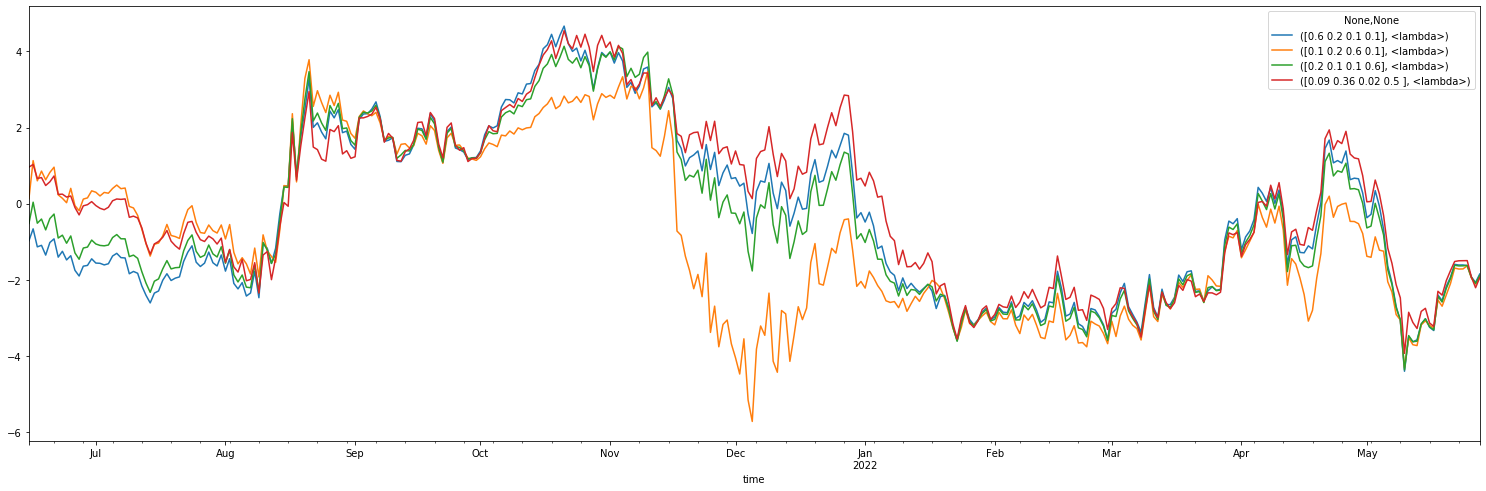

In [13]:
agg_period = 90
sharp_calc_df = portfolios.rolling(agg_period).agg([lambda x: (x[-1]-x[0])/np.std(x)])
sharp_calc_df.dropna().plot(figsize=(26,8))

sharp_df = portfolios.rolling(agg_period).agg([lambda x: (x[-1]-x[0])/np.std(x)]).mean()
print(sharp_df[sharp_df.max()==sharp_df])
portfolios.describe()

In [14]:
def generate_eval_portfolio(first_portfolio=[[.2],[.6],[.1],[.1]]):
    global initial_allocation_total_value
    ratio_ls = [#'BTC','ETH','ADA','USD'
                first_portfolio,
                get_random_ratio(),
                get_random_ratio(),
                get_random_ratio()
                ]

    marker_ls = ['-','-.','x','v']
    portfolios = pd.DataFrame()

    for i,ratio in enumerate(ratio_ls):
        initial_allocation_ratio = np.array(ratio)
        initial_allocation_total_value = 1000.00
        initial_allocation = initial_allocation_ratio  * initial_allocation_total_value
        current_portfolio = get_accumulated_return(initial_allocation_total_value=1000.00, initial_allocation_ratio=initial_allocation_ratio)\
            .sum(axis=1).to_frame().rename(columns={0:str(initial_allocation_ratio.flatten())})
        portfolios = pd.concat([portfolios , current_portfolio], axis=1)

    agg_period = 90
    sharp_calc_df = portfolios.rolling(agg_period).agg([lambda x: (x[-1]-x[0])/np.std(x)])

    sharp_df = portfolios.rolling(agg_period).agg([lambda x: (x[-1]-x[0])/np.std(x)]).mean()
    #display(sharp_df)
    return sharp_df[sharp_df.max()==sharp_df]

### Static portfolio allocation sampling by brute force grid search

In [ ]:
best = 0
optimal_ratio = [[.2],[.6],[.1],[.1]]
for i in range(1000):
    best_out_of_4 = generate_eval_portfolio()
        
    if best_out_of_4.values[0] > best:
        best = best_out_of_4.values[0]
        optimal_ratio = best_out_of_4.index[0][0]
        print('optimal_ratio', optimal_ratio)
        print('best sharp', best)
        plt.show()

optimal_ratio [0.03 0.52 0.04 0.38]
best sharp 0.08026929573977964
optimal_ratio [0.02 0.5  0.02 0.45]
best sharp 0.1021353641001911
optimal_ratio [0.05 0.8  0.02 0.1 ]
best sharp 0.10451954962441827
optimal_ratio [0.04 0.53 0.01 0.4 ]
best sharp 0.10462667626577292
optimal_ratio [0.03 0.45 0.   0.5 ]
best sharp 0.11559288841804463
optimal_ratio [0.01 0.57 0.01 0.4 ]
best sharp 0.11812311683002477


### Dynanmic portfolio allocation thru AI portfolio manager

#### Portfolio rebalancing can be simulated on daily period with the goal of beating the best static allocation. Timeseries crossvalidation will be implemented to validate/simulate the lack of future performance informatio(eg. ETH outperformed all other assets).

#### Model will output portfolio ratios for each of the 4 assets. The loss function will be the rolling 90 day sharp ratio calculated at daily interval.

#### First method will be a simple approach with previous portfolio ratio and aggregated rolling price info as features to a portfolio mangement model. Output will be the asset ratio of the portfolio. Optimization of the model weight will be based on Genetic Algo with the fitness function being the 90 rolling sharp ratio.

## Use longer term return as fitness function in Genetic Algorithm to opitimize Pytorch NN

In [ ]:
from pytorch_tabnet.tab_model import TabNetRegressor

In [ ]:
tabnet = TabNetRegressor()

data_inputs = np.random.random((10000,16))
X_train = pd.DataFrame(data_inputs).sample(100000,replace=True, random_state=0)
y_train = (X_train.iloc[:,0]**2+1).to_frame().sample(100000,replace=True, random_state=0)

tabnet.fit(
    X_train=X_train.values,
    y_train=y_train.values,
    max_epochs=1,
    drop_last=True)

In [ ]:
model = tabnet.network.cpu()

In [ ]:
import pygad
from pygad import torchga

torch_ga = torchga.TorchGA(model=model,
                                num_solutions=10)

In [ ]:
import numpy

# Data inputs
data_inputs = np.random.random((10000,16))

# Data outputs
data_outputs = np.random.random((10000,1))

In [ ]:
model(torch.from_numpy(data_inputs).float()+3)[0]

In [ ]:
loss_function = torch.nn.MSELoss()

def fitness_func(solution, sol_idx):
    global data_inputs, data_outputs, torch_ga, model, loss_function
    
    model_weights_dict = torchga.model_weights_as_dict(model=model,
                                                         weights_vector=solution)
    # Use the current solution as the model parameters.
    model.load_state_dict(model_weights_dict)
    
    predictions = model(torch.from_numpy(data_inputs).float())[0]
    print(predictions)
    solution_fitness = 1.0 / (loss_function(predictions, torch.from_numpy(data_outputs).float()).detach().numpy() + 0.00000001)

    return solution_fitness

In [ ]:
def callback_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))


In [ ]:
num_generations = 250
num_parents_mating = 5
initial_population = torch_ga.population_weights

ga_instance = pygad.GA(num_generations=num_generations, 
                       num_parents_mating=num_parents_mating, 
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       on_generation=callback_generation)

In [ ]:
ga_instance.run()

In [ ]:
ga_instance.plot_result(title="PyGAD & PyTorch - Iteration vs. Fitness")